In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("Mall_Customers.csv")


In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
encoded_df  = pd.get_dummies(df,columns=['Gender'],drop_first = True)
encoded_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
encoded_df.drop('CustomerID',axis=1,inplace=True)
encoded_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


# Exploratory Data Analysis

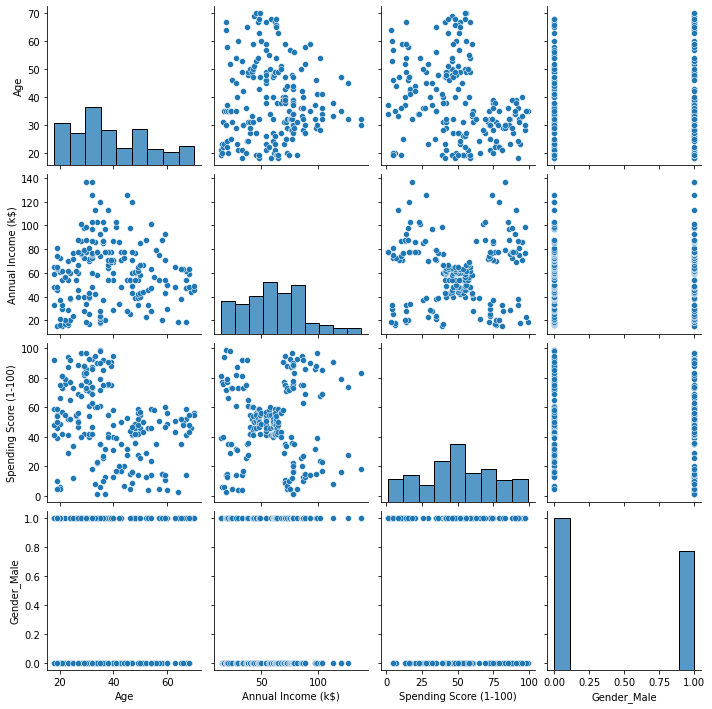

In [25]:
sns.pairplot(encoded_df)
plt.show()

In [26]:
inertia_data = list()
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(encoded_df)
    inertia_data.append(k_means.inertia_)

# Elbow Method

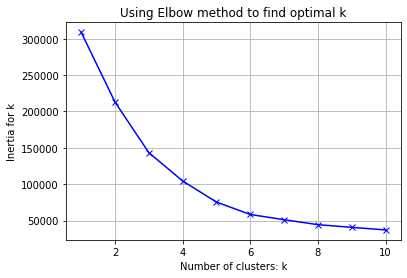

In [30]:
k = range(1,11)
plt.grid()
plt.plot(k,inertia_data,'bx-')
plt.xlabel('Number of clusters: k')
plt.ylabel('Inertia for k')
plt.title('Using Elbow method to find optimal k')
plt.show()

In [31]:
X = encoded_df.iloc[:,[1,2]].values

# K Means

In [32]:
kmeans = KMeans(n_clusters=5,random_state=0)
predict = kmeans.fit_predict(X)
predict

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [33]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

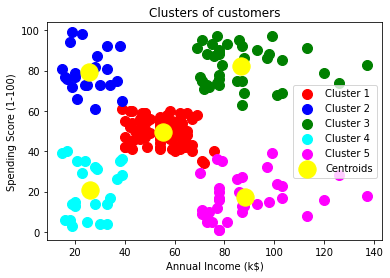

In [34]:
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[predict == 3, 0], X[predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[predict == 4, 0], X[predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Dendogram

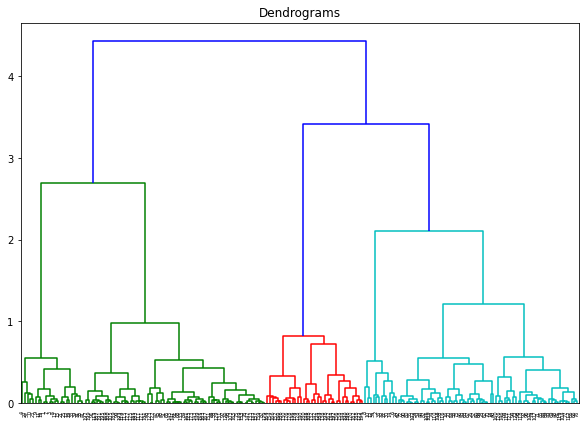

In [35]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))